# Chapter 1:Starting Bioinformatics with R 

---

- 最近在分子生物学的发展，如高通量阵列技术或测序技术，正在导致指数增长的数据量正在产生。
生物信息学的目的是了解生物功能和生物系统的组织。
生成的大量数据需要的统计处理，而统计处理又需要完善的计算统计工具和环境。
R提供了这样的环境。它是一个拥有大型社区的免费工具，通过支持各种分析操作的巨大包库来利用数据分析

---

## 2 Reading and writing data

-  Load internal R data (already available with a package or base R)

In [1]:
data(iris)

- learn more

In [2]:
?iris

- 对于iris数据，类型是一个包含150行和5列的数据框架(输入dim命令，以iris作为参数)。数据帧类是
类似于矩阵，但可以在其中容纳不同类型的对象，如字符、数字和因子。您可以分别使用head或tailfunction查看前几行或最后几行(默认有六行)，如下所示:

In [3]:
class(iris)

[1] "data.frame"

In [4]:
dim(iris)

[1] 150   5

In [5]:
head(iris)  #前面的数据

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


In [6]:
tail(iris)  #后面的数据

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
145,6.7,3.3,5.7,2.5,virginica
146,6.7,3.0,5.2,2.3,virginica
147,6.3,2.5,5.0,1.9,virginica
148,6.5,3.0,5.2,2.0,virginica
149,6.2,3.4,5.4,2.3,virginica
150,5.9,3.0,5.1,1.8,virginica


- Load external R data (conventionally saved as .rda or .RData, but not limited to 
this

In [7]:
load(file="mydata.RData")

- To save a data object

In [8]:
save(D, file="myData.RData")

- To read the tabular data in the form of a .csv file with read.csv or read.table,

In [9]:
mydata <- read.table(file = mydata.csv, header = TRUE, sep="\t", row.names = 1)

ERROR: Error in read.table(file = mydata.csv, header = TRUE, sep = "\t", row.names = 1): 找不到对象'mydata.csv'


In [ ]:
 mydata <- read.csv("mydata.csv")

- 也可以在r中读取Excel文件
诸如xlsx和gdata之类的包。而xlsx包需要Java设置
gdata相对简单。然而，xlsx包提供了更多的功能，
例如工作簿中不同工作表的读取权限以及较新的版本
Excel文件。对于本例，我们将使用xlsx包。使用read.xlsx
函数读取Excel文件如下:

In [ ]:
 install.packages("xlsx", dependencies=TRUE)

In [ ]:
 library(gdata)

In [ ]:
 mydata <- read.xls("mydata.xls")

- 要将这些数据帧或表对象写入CSV或表文件，请使用read.csv
或写

In [ ]:
write.table(x, file = "myexcel.xls", append = FALSE, quote = TRUE, sep = " ")

In [ ]:
write.csv(x, col.names = NA, sep = ",")

- Get the current working directory

In [ ]:
getwd() 

- Change to a desired directory, by the command:

In [ ]:
setwd("/Users/luxuanyi/img")

-  WriteXLS package 可以将在r编辑的对象写进excel

In [ ]:
 install.packages("WriteXLS")
 library(WriteXLS)
 WriteXLS(x, ExcelFileName = "R.xls")

- 该包还允许我们将数据帧列表写入Excel文件的不同工作表中。
WriteXLS函数在后台使用Perl执行任务。
可以在函数中设置sheetargument，并在需要写入数据的地方分配工作表编号。
R中的save函数是保存对象的标准方法。
但是，saveRDSfunction有一个优点，它不保存对象及其名称;
它只是保存了对象的一个表示。
因此，可以将保存的对象加载到R中的命名对象中，该对象与最初序列化时的名称不同。
让我们看看下面的例子:

In [ ]:
saveRDS(myObj, "myObj.rds")
myObj2 <- readRDS("myObj.rds")
ls()

(1)create a object "d", it's a data frame

In [ ]:

d <- data.frame(obs = c(1, 2, 3, 4, 5, 6), 
                treat = c("A", "B", "A", "A", "O", "B"), 
                weight = c(2.3, NA, 9, 8, 4, 7))
d

(2) 将数据写入内存：TXT, CSV, or XLSX file and even a .RData

In [ ]:
# A TXT file
write.table(d, file = "F:/d.txt", row.names = F, quote = T, sep = "\t")

# A CSV file
write.csv(d, file = "F:/d.csv", row.names = F,quote = F)

# .RData
save(d, file = "F:/d.RData")

#.RDS
saveRDS(d, file = "F:/d.RDS")

In [ ]:
library(openxlsx) #read and write .xlsx file need R package "openxlsx"
#A xlsx file
write.xlsx(d, file = "F:/d.xlsx", row.names = F,quote = F)

（3）反之，用r读取上述文件

In [ ]:
d1 = read.table("F:/d.txt")
d1
d2 = read.csv("F:/d.csv")
d2
d3 = read.xlsx("F:/d.xlsx")
d3
d4 = readRDS("F:/d.RDS")
d4
load("F:/d.RData")

---

 ## 3， Basic statistical operations on data 基本的数据统计操作

- R便于计算各种统计参数，如均值
标准差，具有简单的函数。这可以应用于单个向量
或对整个数据帧如下:

In [10]:
 summary(iris) # 显示每个列的摘要

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :50  
 versicolor:50  
 virginica :50  
                
                
                

In [13]:
mean(iris[,1])   #均值

[1] 5.843333

In [14]:
sd(iris[, 1])  #标准差

[1] 0.8280661

In [15]:
 cor(iris[,1], iris[,2])  #cor函数允许计算两个向量之间的相关性

[1] -0.1175698

In [16]:
 cor(iris[,1], iris[,3])  #相关性

[1] 0.8717538

In [17]:
 Cov.mat <- cov(iris[,1:4])  #矩阵的协方差

In [18]:
 Cov.mat

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Sepal.Length,0.6856935,-0.0424340,1.2743154,0.5162707
Sepal.Width,-0.0424340,0.1899794,-0.3296564,-0.1216394
Petal.Length,1.2743154,-0.3296564,3.1162779,1.2956094
Petal.Width,0.5162707,-0.1216394,1.2956094,0.5810063


---

## 4. Generating probability distributions 生成概率分布

（1）首先生成100个正态分布的随机数。均值为1 ，标准差为0.1

In [19]:
 n.data <- rnorm(n=100, mean=1, sd=0.1)

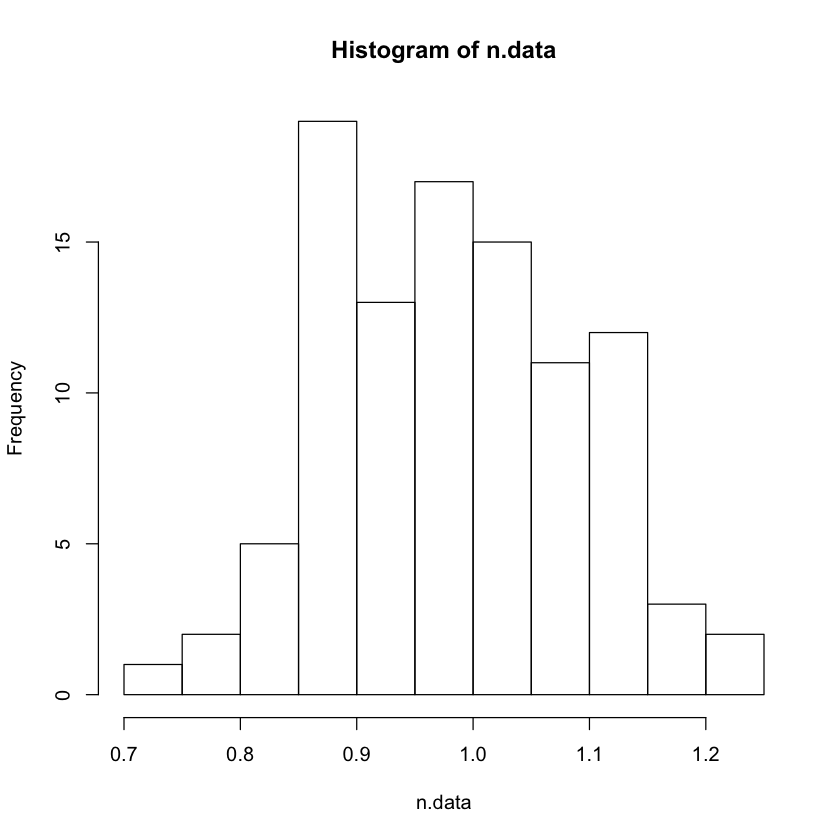

In [20]:
hist(n.data)  #生成直方图

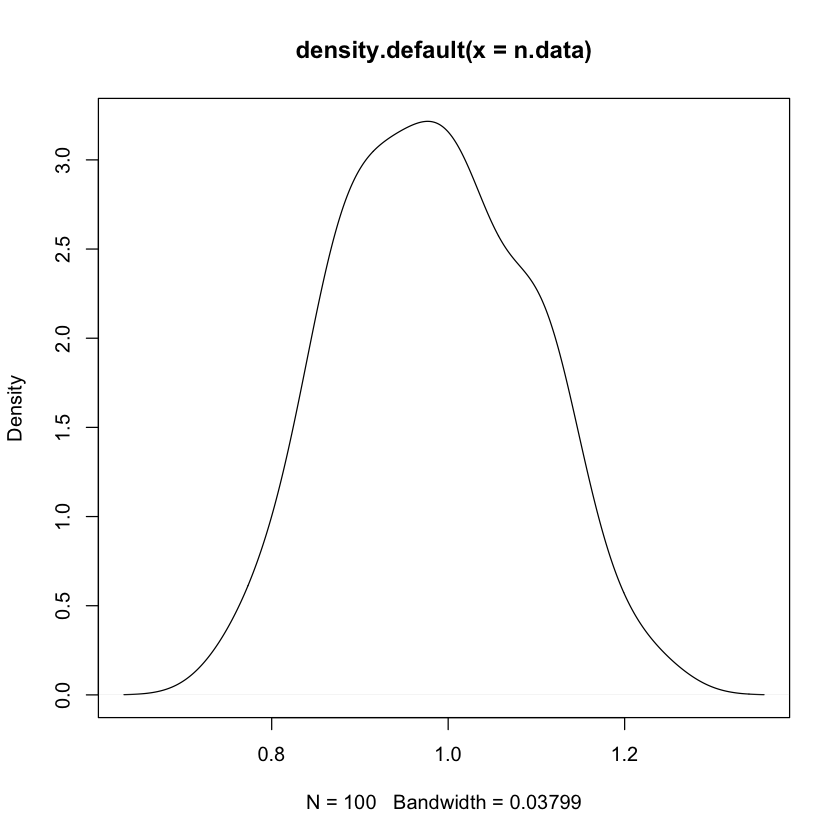

In [21]:
 plot(density(n.data))#观察密度的分布，并观察形状

In [22]:
 ?pnorm  #获得相应参数

---

## 5. Performing statistical tests on data对数据进行统计检验

 - 统计检验用于评估研究或应用结果的重要性，并帮助做出定量决策。当我们需要比较一个组与一个假设值和我们的测量值服从高斯分布，可以采用单样本t检验。然而,如果
我们有两个成对的组(都是服从高斯分布的测量值)
相比之下，我们可以使用配对t检验。R具有执行此类测试的内置函数

<font color = red>（1）t检验

In [23]:
 data(sleep)  #加载出数据

In [27]:
###要对第一列和第二列(这两种情况的值)执行双侧非配对t检验，请输入以下命令:
test <- t.test(sleep[,1]~sleep[,2])   
 test


	Welch Two Sample t-test

data:  sleep[, 1] by sleep[, 2]
t = -1.8608, df = 17.776, p-value = 0.07939
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -3.3654832  0.2054832
sample estimates:
mean in group 1 mean in group 2 
           0.75            2.33 


In [28]:
##创建一个列联表
cont <- matrix(c(14, 33, 7, 3), ncol = 2)
cont

14,7
33,3


<font color = red>（2）卡方检验： 创建一个表来表示两种类型的汽车，即轿车和敞篷车
(列)和两种性别，男性和女性，以及拥有这些的计数
一排排汽车的类型。因此，您有以下输出:

In [29]:
colnames(cont) <- c("Sedan", "Convertible")
rownames(cont) <- c("Male", "Female")
cont

,Sedan,Convertible
Male,14,7
Female,33,3


- 为了找到车的类型和性别，在此基础上进行卡方检验
列联表如下:

In [31]:
test <- chisq.test(as.table(cont))
test

Warning message in chisq.test(as.table(cont)):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test with Yates' continuity correction

data:  as.table(cont)
X-squared = 4.1324, df = 1, p-value = 0.04207


<font color= red>（3）对于Wilcoxon符号秩检验，首先创建一组包含观测值的向量
将被测试为x和y，如下面的命令所示:

In [32]:
x <- c(1.83, 0.50, 1.62, 2.48, 1.68, 1.88, 1.55, 3.06, 1.30)
y <- c(0.878, 0.647, 0.598, 2.05, 1.06, 1.29, 1.06, 3.14, 1.29)

- 后面是运行Wilcoxon所需执行的命令
signed-rank检验如下

In [33]:
 test <- wilcox.test(x, y, paired = TRUE, alternative = "greater")
 str(test)

List of 7
 $ statistic  : Named num 40
  ..- attr(*, "names")= chr "V"
 $ parameter  : NULL
 $ p.value    : num 0.0195
 $ null.value : Named num 0
  ..- attr(*, "names")= chr "location shift"
 $ alternative: chr "greater"
 $ method     : chr "Wilcoxon signed rank test"
 $ data.name  : chr "x and y"
 - attr(*, "class")= chr "htest"


In [34]:
test$p.value

[1] 0.01953125

---

## 6.Visualizing data可视化数据

(1)创建一个散点图，从你的iris数据集开始。你想要看到的是
萼片长度和花瓣长度的变化。你需要一张萼片长度的图
(1列)沿y轴，花瓣长度(4列)沿x轴，为

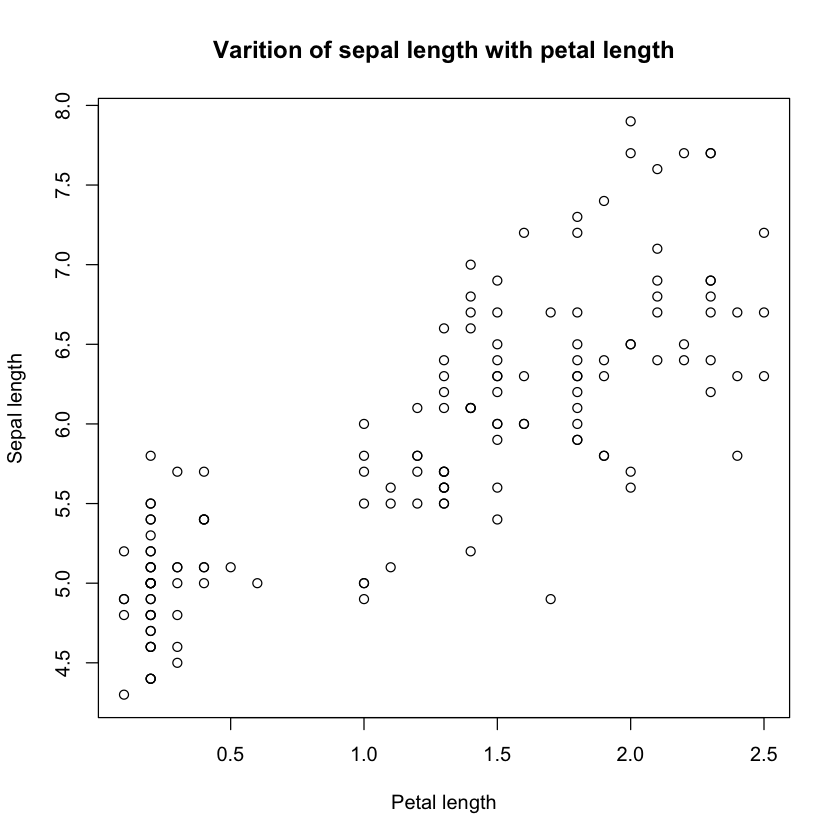

In [36]:
sl <- iris[,1]
pl <- iris[,4]
plot(x=pl, y=sl, xlab="Petal length", ylab="Sepal length", col="black", main="Varition of sepal length with petal length")

(2)箱式图

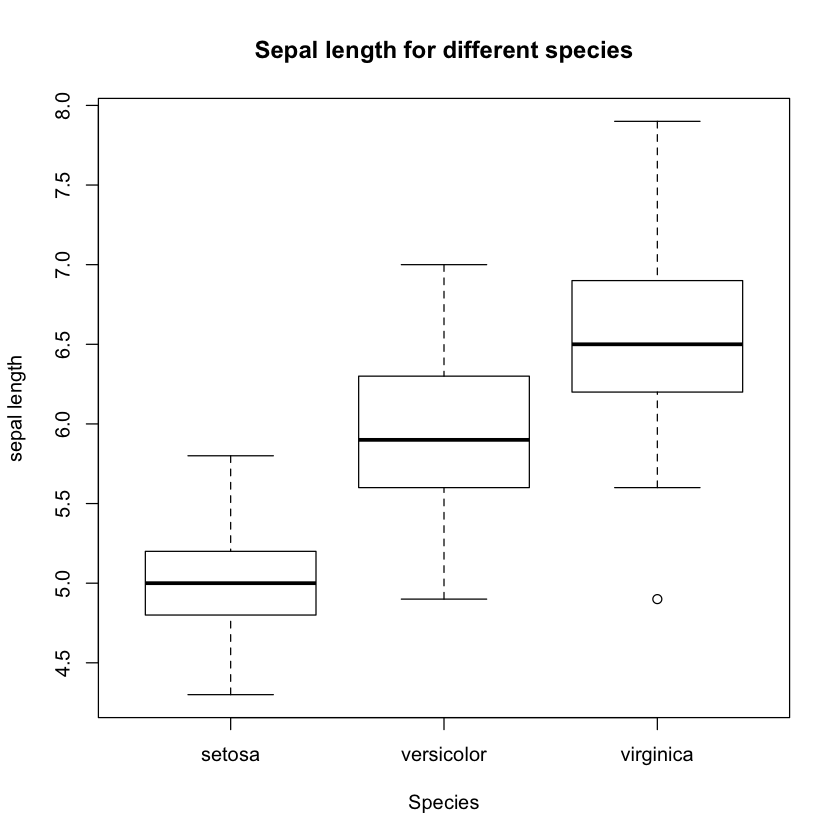

In [38]:
 boxplot(Sepal.Length~Species, data=iris, ylab="sepal length", xlab="Species", main="Sepal length for different species")

（3）然而，绘制线图与绘制散点图是一样的;只是介绍
另一个参数类型，并设置为'l'。然而，我们使用不同的，
自创建的数据集描述如下:

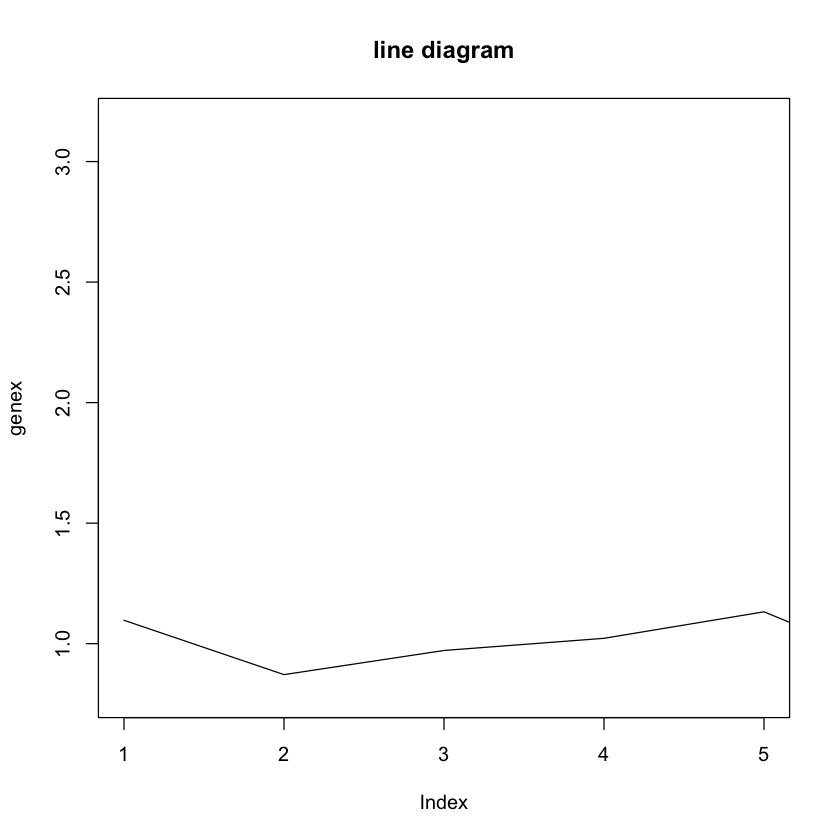

In [39]:
genex <- c(rnorm(100, 1, 0.1), rnorm(100, 2, 0.1), rnorm(50, 3, 0.1)) 
plot(x=genex, xlim=c(1,5), type='l', main="line diagram")

（4）直方图可以用来可视化的密度的数据和频率的每一个
类别。

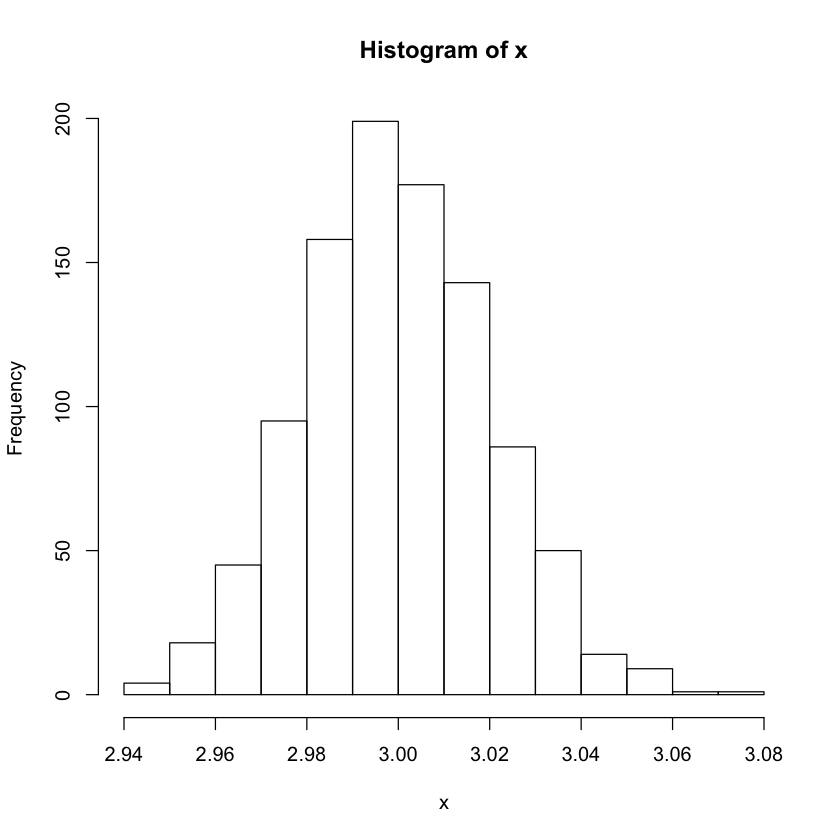

In [40]:
x <- rnorm(1000, 3, 0.02)
hist(x)

---

## 7.Working with PubMed in R

- 查阅现有的文献。PubMed提供查阅文献的服务。该服务由NCBI-Entrez数据库提供(如下图所示)，可在https://www.ncbi.nlm.nih.gov 获得。R提供了一个通过PubMed查看文献各个方面的接口。本节提供了处理此类接口的协议。这种方法允许在R程序本身中进行搜索、存储、挖掘和量化元分析，而不需要每次都访问PubMed页面，从而帮助实现分析自动化。下面的截图
显示PubMed网页进行查询和检索

（1）需要RISmed包

In [42]:
 library(RISmed)

（2）载入数据

In [43]:
 data(myeloma) 

In [44]:
 ls()     #查找使用ls()加载到R工作区中的骨髓瘤对象

[1] "affyLib"       "ALL"           "cont"          "Cov.mat"      
 [5] "D"             "geneList"      "genex"         "GOgenes"      
 [9] "i"             "iris"          "kegg"          "mapped_probes"
[13] "myEID"         "myEIDs"        "myeloma"       "MyEntrez"     
[17] "myGO"          "myGO_All"      "mylength"      "myMap"        
[21] "mySymbols"     "n.data"        "old.o"         "op"           
[25] "pl"            "r"             "sl"            "sleep"        
[29] "test"          "topDiffGenes"  "x"             "y"

In [45]:
 str(myeloma)   #查看目录

Formal class 'Medline' [package "RISmed"] with 59 slots
  ..@ Query               : chr "\"multiple myeloma\"[MeSH Terms] AND 2012/05/08[EDAT] : 2013/05/08[EDAT]"
  ..@ PMID                : chr [1:10] "23648714" "23648667" "23648347" "23648290" ...
  ..@ YearReceived        : num [1:10] NA 2013 NA 2013 2013 ...
  ..@ MonthReceived       : num [1:10] NA 4 NA 4 2 NA NA 7 NA 3
  ..@ DayReceived         : num [1:10] NA 18 NA 16 3 NA NA 18 NA 4
  ..@ HourReceived        : num [1:10] NA NA NA NA NA NA NA NA NA NA
  ..@ MinuteReceived      : num [1:10] NA NA NA NA NA NA NA NA NA NA
  ..@ YearAccepted        : num [1:10] NA 2013 NA 2013 2013 ...
  ..@ MonthAccepted       : num [1:10] NA 5 NA 4 3 NA 5 3 NA 3
  ..@ DayAccepted         : num [1:10] NA 1 NA 18 18 NA 1 26 NA 4
  ..@ HourAccepted        : num [1:10] NA NA NA NA NA NA NA NA NA NA
  ..@ MinuteAccepted      : num [1:10] NA NA NA NA NA NA NA NA NA NA
  ..@ YearEpublish        : num [1:10] 2012 NA NA NA NA ...
  ..@ MonthEpublish       

In [46]:
AbstractText(myeloma)
Author(myeloma)
ArticleTitle(myeloma)
Title(myeloma)
PMID(myeloma)

[1] "OBJECTIVE: We retrospectively investigated the efficacy and predictive factors for the treatment outcomes of bortezomib plus dexamethasone (BD) as second-line induction therapy prior to high-dose chemotherapy supported by autologous stem cell transplantation (HDT/ASCT) in multiple myeloma (MM) patients.METHODS: Sixty-six transplant eligible MM patients treated by the Kyoto Clinical Hematology Study Group between 2006 and 2011 were investigated. Conventional induction chemotherapy, including vincristine, doxorubicin and dexamethasone (VAD) and high-dose dexamethasone (HDD), was used as first-line induction therapy in all patients, seven (10.6%) of whom attained a very good partial response (VGPR). Of the 59 patients who did not attain VGPR with VAD or HDD, 33 were given BD as second-line induction therapy prior to HDT/ASCT.RESULTS: Patients not treated with BD induction showed an overall response rate (ORR, i.e., better than partial response) of 85.3% after induction therapy, while the ORR of patients treated with BD induction improved from 42.4% after conventional induction therapy to 84.8% after BD. The overall survival (OS) and progression-free survival (PFS) of patients not treated with BD induction were not significantly influenced by the response to induction therapy. Among the patients treated with BD, failure in attaining VGPR prior to ASCT was associated with a significantly shorter PFS and it also tended to show a shorter OS, while the disease stage and achievement of a complete response after HDT/ASCT had no impact on OS or PFS.CONCLUSION: The achievement of at least VGPR with second-line BD induction therapy is a prerequisite for attaining longer OS and PFS after HDT/ASCT."                                              
 [2] "The combination of lenalidomide and dexamethasone (Len-Dex) is a commonly used initial therapy for newly diagnosed multiple myeloma (MM). Although the initial response rates and toxicity are well known, long-term outcome is not well described. We studied 286 consecutive patients with newly diagnosed MM initially treated with Len-Dex. The median (range) age at diagnosis was 63 (28-92) years, 166 (58%) patients ≤ 65 years and 175 (61%) male. The median estimated duration on Len-Dex was 5.3 months with overall response (≥ partial response) of 72%, including 26% with very good partial response or better. The median overall survival (OS) from the diagnosis was not reached (NR) and the estimated 5-year survival was 71%. The median time to first disease progression, irrespective of transplant status, was 30.2 months. Overall, 143 (50%) patients underwent stem cell transplant. The median OS was NR for patients ≤ 70 years and 5.8 years for the older patients (P=0.01). The 5-year OS estimate for patients in International Staging System stage 1, 2 and 3 were 82, 65, and 44% respectively. There were 21 new second malignancies after MM diagnosis (6.6%). The median survival exceeding 7 years reflects the efficacy of novel agents. The risk of second malignancies doesn't appear to be excessive in this population."                                                                                                                                                                                                                                                                                                                                                                                                                                                     
 [3] "OBJECTIVE: To evaluate the efficacy and prognostic factors of autologous hematopoietic stem cell transplantation (ASCT) in multiple myeloma (MM) patients.METHODS: Retrospective analysis was performed in 27 MM patients undergoing ASCT at our hospital from May 2004 to August 2011. After comparing with 28 patients achieving very good partial response (VGPR) or better outcome and not undergoing ASCT, the impact on the extent of response, progression-free survival (P

LastName,ForeName,Initials,order
<chr>,<chr>,<chr>,<int>
Kobayashi,Tsutomu,T,1
Kuroda,Junya,J,2
Fuchida,Shin-ichi,S,3
Murakami,Satoshi,S,4
Hatsuse,Mayumi,M,5
Okano,Akira,A,6
Iwai,Toshiki,T,7
Tsutsumi,Yasuhiko,Y,8
Kamitsuji,Yuri,Y,9


[1] "The response to second-line induction with bortezomib and dexamethasone is predictive of long-term outcomes prior to high-dose chemotherapy with autologous stem cell transplantation for multiple myeloma."
 [2] "Long-term outcome with lenalidomide and dexamethasone therapy for newly diagnosed multiple myeloma."                                                                                                        
 [3] "[Retrospective analysis on therapeutic effect of autologous hematopoietic stem cell transplantation in multiple myeloma patients]."                                                                         
 [4] "Mechanistic studies on the synergistic cytotoxicity of the nucleoside analogs gemcitabine and clofarabine in multiple myeloma: relevance of p53 and its clinical implications."                             
 [5] "TRIM13 (RFP2) downregulation decreases tumour cell growth in multiple myeloma through inhibition of NF Kappa B pathway and proteasome activity."                                                            
 [6] "False-positive PET scan after bone marrow biopsy."                                                                                                                                                          
 [7] "Differences in the distribution of cytogenetic subtypes between multiple myeloma patients with and without a family history of monoclonal gammopathy and multiple myeloma."                                 
 [8] "Inhibition of DEPDC1A, a bad prognostic marker in multiple myeloma, delays growth and induces mature plasma cell markers in malignant plasma cells."                                                        
 [9] "Natural history and prognostic impact of oligoclonal humoral response in patients with multiple myeloma after autologous stem cell transplantation: long-term results from a single institution."           
[10] "Cellular immunotherapy for plasma cell myeloma."

[1] "Internal medicine (Tokyo, Japan)" "Leukemia"                        
 [3] "Zhonghua yi xue za zhi"           "Experimental hematology"         
 [5] "British journal of haematology"   "British journal of haematology"  
 [7] "European journal of haematology"  "PloS one"                        
 [9] "Haematologica"                    "Bone marrow transplantation"

[1] "23648714" "23648667" "23648347" "23648290" "23647456" "23647318"
 [7] "23647020" "23646139" "23645688" "23645169"

（3）创建自定义查询

In [47]:
cancer <- EUtilsSummary("cancer[ti]", type="research", db="pubmed")

Warning message in file(con, "r"):
“cannot open URL 'https://eutils.ncbi.nlm.nih.gov/entrez/eutils/research.fcgi?db=pubmed&term=cancer[ti]&retmax=1000&tool=RISmed&email=s.a.kovalchik@gmail.com': HTTP status was '400 Bad Request'”


ERROR: Error in file(con, "r"): cannot open the connection to 'https://eutils.ncbi.nlm.nih.gov/entrez/eutils/research.fcgi?db=pubmed&term=cancer[ti]&retmax=1000&tool=RISmed&email=s.a.kovalchik@gmail.com'


In [ ]:
class(cancer)

---

## 8.Retrieving data from BioMart  

（1）加载biomaRt包 和 想要检索的数据

In [49]:
 library(biomaRt)

(2)通过为查询定义正确的数据库来选择适当的mart进行检索。
在这里，你将寻找人类的ensembl基因;因此，运行useMart函数

In [50]:
 mart <- useMart(biomart = "ensembl", dataset = "hsapiens_gene_ensembl")

(3)你将从ensembl数据中得到基因列表

In [51]:
 my_results <- getBM(attributes = c("hgnc_symbol"), mart = mart)

(4)从检索到的基因中抽取一些基因样本，比如50个

In [52]:
 N <- 50
 mysample <- sample(my_results$hgnc_symbol,N)
 head(mysample)

[1] "DEFB133"   "KRTAP4-9"  "NCDN"      "RNU6-426P" "MIR3910-1" "CD300A"

(5)biomaRt包也可以用于从数据库中检索序列
对于一个基因，即“BRCA1”

In [57]:
seq <- getSequence(id="BRCA1", type="hgnc_symbol", seqType="peptide", mart = mart)
show(seq)

Cache found



(6)检索指定染色体位置的序列
位置(站点的上游和下游)也可以使用

In [59]:
 seq2 <- getSequence(id="ENST00000520540", type='ensembl_transcript_id',seqType='gene_flank',upstream = 30,mart = mart)
show(seq2)

Cache found



                      gene_flank ensembl_transcript_id
1 AATGAAAAGAGGTCTGCCCGAGCGTGCGAC       ENST00000520540
